In [1]:
import pandas as pd
import numpy as np

# File paths
features_file = "Bike_Features.csv"
reviews_file = "Bikes_reviews.csv"
output_file = "Merged_Bike_Features_with_Ratings.csv"

# Read the CSVs
features_df = pd.read_csv(features_file, encoding="latin1")
reviews_df = pd.read_csv(reviews_file, encoding="latin1")

# Fix column name issue in reviews
reviews_df.rename(columns={reviews_df.columns[0]: "Variant Name"}, inplace=True)
features_df.rename(columns={"On-road prize": "Price INR"}, inplace=True)

In [2]:
# Merge Average_stars into features file based on Variant Name
merged_df = features_df.merge(
    reviews_df[["Variant Name", "Average_stars"]].drop_duplicates(),
    on="Variant Name",
    how="left"
)

# Fill missing ratings with random values between 3.0 and 5.0
merged_df["Average_stars"] = merged_df["Average_stars"].apply(
    lambda x: round(np.random.uniform(3.0, 5.0), 1) if pd.isna(x) else x
)
# Drop unwanted columns
columns_to_drop = ["Company Name","Displacement","Clutch","Ignition","Gear Box","Bore","Stroke","Compression Ratio","City Mileage","Peak Power","Transmission","Engine Type","Max Torque","Starting","Unnamed: 23", "Highway Mileage", "0-100 Kmph (ec)"]  # customize this
merged_df = merged_df.drop(columns=columns_to_drop, errors="ignore")

# Save merged result
merged_df.to_csv(output_file, index=False)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Merged_Bike_Features_with_Ratings.csv')

# Check column names
print("\nColumn Names:")
print(df.columns.tolist())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# See all unique body types
print("\nUnique Body Types:")
print(df['Body Type'].unique())
print(f"\nTotal unique body types: {df['Body Type'].nunique()}")


Column Names:
['Variant Name', 'Price INR', 'No. of Cylinders', 'Cooling System', 'Valve Per Cylinder', 'Fuel Supply', 'Body Type', 'Average_stars']

Missing Values:
Variant Name          0
Price INR             0
No. of Cylinders      0
Cooling System        0
Valve Per Cylinder    0
Fuel Supply           0
Body Type             0
Average_stars         0
dtype: int64

Unique Body Types:
['Scooter' 'Sports Bikes' 'Sports Naked Bikes, Sports Bikes'
 'Commuter Bikes' 'Range - 108 km/charge' 'Street Bikes' 'Cruiser Bikes'
 'Adventure Tourer Bikes' 'Sports Naked Bikes' 'Cafe Racer Bikes'
 'Super Bikes' 'Cafe Racer' 'Sports Bike' 'Adventure' 'Super Bike'
 'Tourer Bikes' ' Super Bikes, Sports Naked Bikes'
 'Super Bikes, Sports Naked Bikes' 'Super Bikes, Sports Bikes'
 'Adventure Tourer Bikes, Off Road Bikes' 'Tourer Bike' 'Super Sport Bike'
 'Sports Tourer Bikes' ' Sports Bikes' 'Off Road Bikes'
 'sports-naked,cafe-racer' 'Sports Naked Bikes, Cafe Racer Bikes'
 'Adventure Touring' 'Adventur

In [4]:
# Add serial number column starting from 1
df.insert(0, "S.No", range(1, len(df) + 1))
print(df)

     S.No                           Variant Name  Price INR No. of Cylinders  \
0       1                  Aprilia SR 160 Carbon     147307                1   
1       2                     Aprilia SR 160 STD     144523                1   
2       3                    Aprilia SR 160 Race     154779                1   
3       4                     Aprilia RS 660 STD    1551922                1   
4       5                   Aprilia SR Storm STD     124892                1   
..    ...                                    ...        ...              ...   
569   570                Yezdi Adventure - Gloss     249926                1   
570   571             Yezdi Roadster Inferno Red     234789                1   
571   572  Yezdi Adventure - Matte - Mambo Black     249880                1   
572   573            Yezdi Scrambler Single Tone     245493                1   
573   574              Yezdi Scrambler Dual Tone     250200                1   

    Cooling System Valve Per Cylinder  

In [5]:
# Count how many vehicles of each body type
body_type_counts = df['Body Type'].value_counts()

print("VEHICLE COUNT BY BODY TYPE")

print(body_type_counts)
print("\n")

# Summary
print(f"Most common vehicle type: {body_type_counts.index[0]} with {body_type_counts.iloc[0]} vehicles")
print(f"Least common vehicle type: {body_type_counts.index[-1]} with {body_type_counts.iloc[-1]} vehicles")

VEHICLE COUNT BY BODY TYPE
Body Type
Cruiser Bikes                                            130
Scooter                                                   75
Sports Bikes                                              62
Commuter Bikes                                            59
Sports Naked Bikes                                        34
Adventure                                                 18
Adventure Tourer Bikes, Off Road Bikes                    16
Adventure Tourer Bikes                                    15
Sports Naked Bikes, Sports Bikes                          14
Super Bikes, Sports Bikes                                 13
Cafe Racer Bikes                                          12
Super Bikes                                               11
Tourer Bikes                                              10
Adventure Tourer Bikes, Tourer Bikes                       9
Sports Naked Bikes, Cafe Racer Bikes                       9
Sports Bike                                     

POPULARITY ANALYSIS - REVIEWS BY BODY TYPE
Body Type
Cruiser Bikes                                            3.986154
Scooter                                                  4.013333
Sports Bikes                                             3.912903
Commuter Bikes                                           3.994915
Sports Naked Bikes                                       3.900000
Adventure                                                4.105556
Adventure Tourer Bikes, Off Road Bikes                   4.000000
Adventure Tourer Bikes                                   3.993333
Sports Naked Bikes, Sports Bikes                         4.050000
Super Bikes, Sports Bikes                                4.261538
Cafe Racer Bikes                                         4.150000
Super Bikes                                              3.854545
Tourer Bikes                                             4.160000
Sports Naked Bikes, Cafe Racer Bikes                     3.933333
Adventure Tourer Bikes,

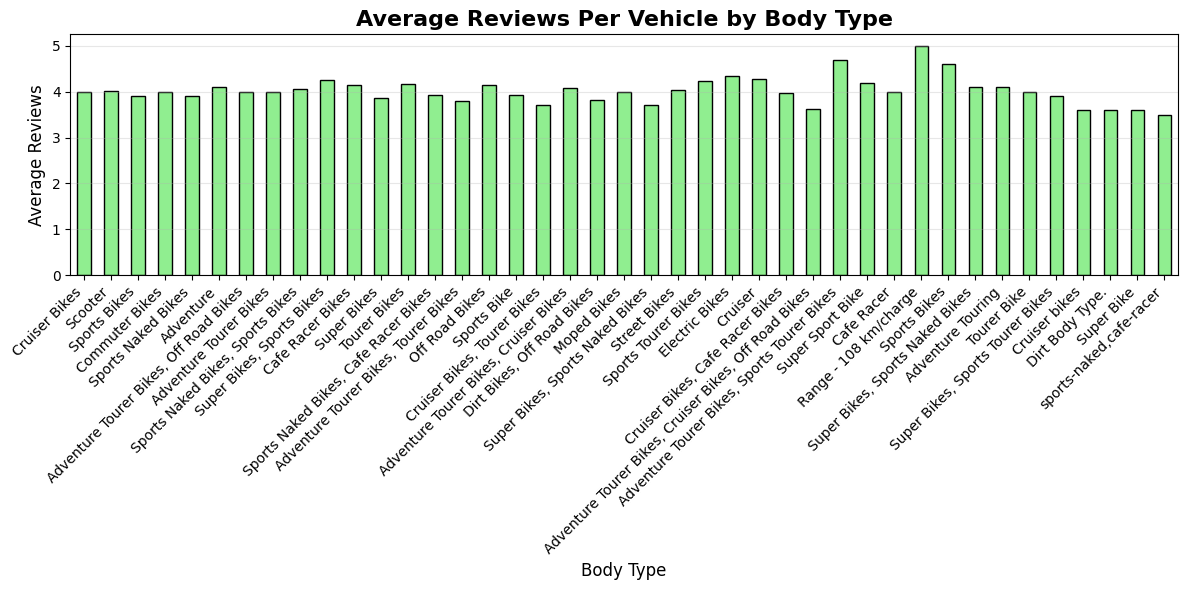

In [9]:

reviews_by_type = df.groupby('Body Type')['Average_stars'].agg(['sum', 'mean', 'count'])
reviews_by_type.columns = ['Total_Reviews', 'Avg_Reviews_Per_Vehicle', 'Vehicle_Count']

reviews_by_type = reviews_by_type.sort_values('Total_Reviews', ascending=False)

print("POPULARITY ANALYSIS - REVIEWS BY BODY TYPE")
print(reviews_by_type['Avg_Reviews_Per_Vehicle'])
print("\n")


# Create visualization for average reviews per vehicle
plt.figure(figsize=(12, 6))
reviews_by_type['Avg_Reviews_Per_Vehicle'].plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Reviews Per Vehicle by Body Type', fontsize=16, fontweight='bold')
plt.xlabel('Body Type', fontsize=12)
plt.ylabel('Average Reviews', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



In [8]:
# Key insights
print("KEY INSIGHTS")
print(f"Most Popular (Total Reviews): {reviews_by_type.index[0]} with {reviews_by_type['Total_Reviews'].iloc[0]:.0f} total reviews")
print(f"Highest Engagement per Vehicle: {reviews_by_type.sort_values('Avg_Reviews_Per_Vehicle', ascending=False).index[0]}")
print(f"Average reviews: {reviews_by_type.sort_values('Avg_Reviews_Per_Vehicle', ascending=False)['Avg_Reviews_Per_Vehicle'].iloc[0]:.2f} reviews/vehicle")

KEY INSIGHTS
Most Popular (Total Reviews): Cruiser Bikes with 518 total reviews
Highest Engagement per Vehicle: Range - 108 km/charge
Average reviews: 5.00 reviews/vehicle


AVERAGE VEHICLE PRICE BY BODY TYPE
Body Type
Adventure Tourer Bikes, Tourer Bikes                     5001406.0
Cruiser Bikes, Tourer Bikes                              4890727.0
Adventure Tourer Bikes, Cruiser Bikes                    4177620.0
Tourer Bike                                              3673262.0
Tourer Bikes                                             3568699.0
Adventure Touring                                        3498562.0
Adventure                                                3398216.0
Super Bikes, Sports Bikes                                3204037.0
Sports Tourer Bikes                                      2598251.0
Super Bike                                               2549877.0
Super Sport Bike                                         2454187.0
Cafe Racer                                               2395080.0
Adventure Tourer Bikes, Sports Tourer Bikes              2380706.0
Super Bikes                                              2265332.0
Super Bikes, Spor

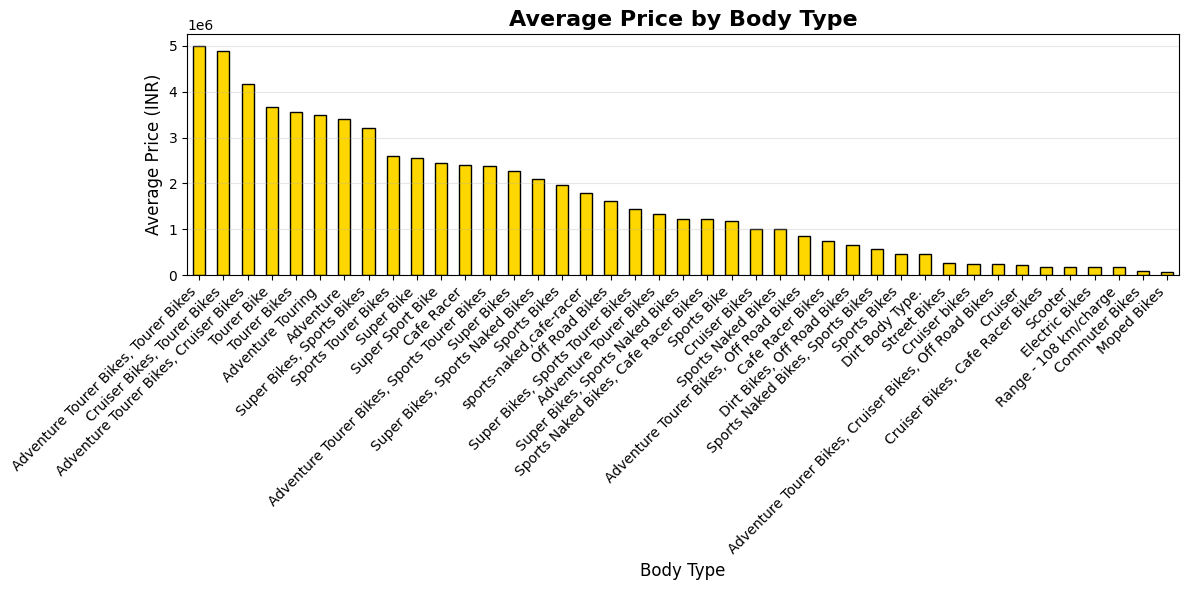

In [11]:
# Calculate price statistics for each body type
price_analysis = df.groupby('Body Type').agg({
    'Price INR': ['mean', 'min', 'max'],
}).round(0)

# Flatten column names
price_analysis.columns = ['Avg_Price', 'Min_Price', 'Max_Price']

price_analysis = price_analysis.sort_values('Avg_Price')

df['avg_price'] = (df['Price INR'])
avg_price_by_type = df.groupby('Body Type')['avg_price'].mean().sort_values(ascending=False)

print("AVERAGE VEHICLE PRICE BY BODY TYPE")

print(avg_price_by_type.round(0))
print("\n")

# Create bar chart for average prices
plt.figure(figsize=(12, 6))
avg_price_by_type.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Average Price by Body Type', fontsize=16, fontweight='bold')
plt.xlabel('Body Type', fontsize=12)
plt.ylabel('Average Price (INR)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [12]:


# Identify affordable segments
print("PRICING INSIGHTS")

print(f"Most Affordable Type: {avg_price_by_type.index[-1]} (Avg: ₹{avg_price_by_type.iloc[-1]:,.0f})")
print(f"Most Expensive Type: {avg_price_by_type.index[0]} (Avg: ₹{avg_price_by_type.iloc[0]:,.0f})")

PRICING INSIGHTS
Most Affordable Type: Moped Bikes (Avg: ₹61,669)
Most Expensive Type: Adventure Tourer Bikes, Tourer Bikes (Avg: ₹5,001,406)


In [17]:
# Create a comprehensive summary table
summary_data = {
    'Body_Type': body_type_counts.index,
    'Vehicle_Count': body_type_counts.values,
    'Total_Reviews': [reviews_by_type.loc[bt, 'Total_Reviews'] if bt in reviews_by_type.index else 0 for bt in body_type_counts.index],
    'Avg_Reviews_Per_Vehicle': [reviews_by_type.loc[bt, 'Avg_Reviews_Per_Vehicle'] if bt in reviews_by_type.index else 0 for bt in body_type_counts.index],
    'Avg_Price_INR': [avg_price_by_type.loc[bt] if bt in avg_price_by_type.index else 0 for bt in body_type_counts.index]
}

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Total_Reviews', ascending=False)

print("="*120)
print("COMPREHENSIVE MARKET ANALYSIS SUMMARY")
print("="*120)
print(summary_df.to_string(index=False))
print("\n")

# Calculate scores for each body type (normalized)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
summary_df['Popularity_Score'] = scaler.fit_transform(summary_df[['Total_Reviews']]) * 100
summary_df['Affordability_Score'] = (1 - scaler.fit_transform(summary_df[['Avg_Price_INR']])) * 100

# Calculate overall score (weighted average)
summary_df['Overall_Score'] = (
    summary_df['Popularity_Score'] * 0.40 +
    summary_df['Affordability_Score'] * 0.25
).round(2)

summary_df = summary_df.sort_values('Overall_Score', ascending=False)

# Top 3 recommendations

print("TOP 3 RECOMMENDATIONS FOR EV LAUNCH")

top_3 = summary_df.head(3)
for idx, (i, row) in enumerate(top_3.iterrows(), 1):
    print(f"\n{idx}. {row['Body_Type']}")
    print(f"   - Total Reviews: {row['Total_Reviews']:.0f}")
    print(f"   - Average Price: ₹{row['Avg_Price_INR']:,.0f}")
    print(f"   - Overall Score: {row['Overall_Score']:.2f}/100")

COMPREHENSIVE MARKET ANALYSIS SUMMARY
                                            Body_Type  Vehicle_Count  Total_Reviews  Avg_Reviews_Per_Vehicle  Avg_Price_INR
                                        Cruiser Bikes            130          518.2                 3.986154   1.017163e+06
                                              Scooter             75          301.0                 4.013333   1.757079e+05
                                         Sports Bikes             62          242.6                 3.912903   4.533579e+05
                                       Commuter Bikes             59          235.7                 3.994915   9.807200e+04
                                   Sports Naked Bikes             34          132.6                 3.900000   1.005842e+06
                                            Adventure             18           73.9                 4.105556   3.398216e+06
               Adventure Tourer Bikes, Off Road Bikes             16           64.0           

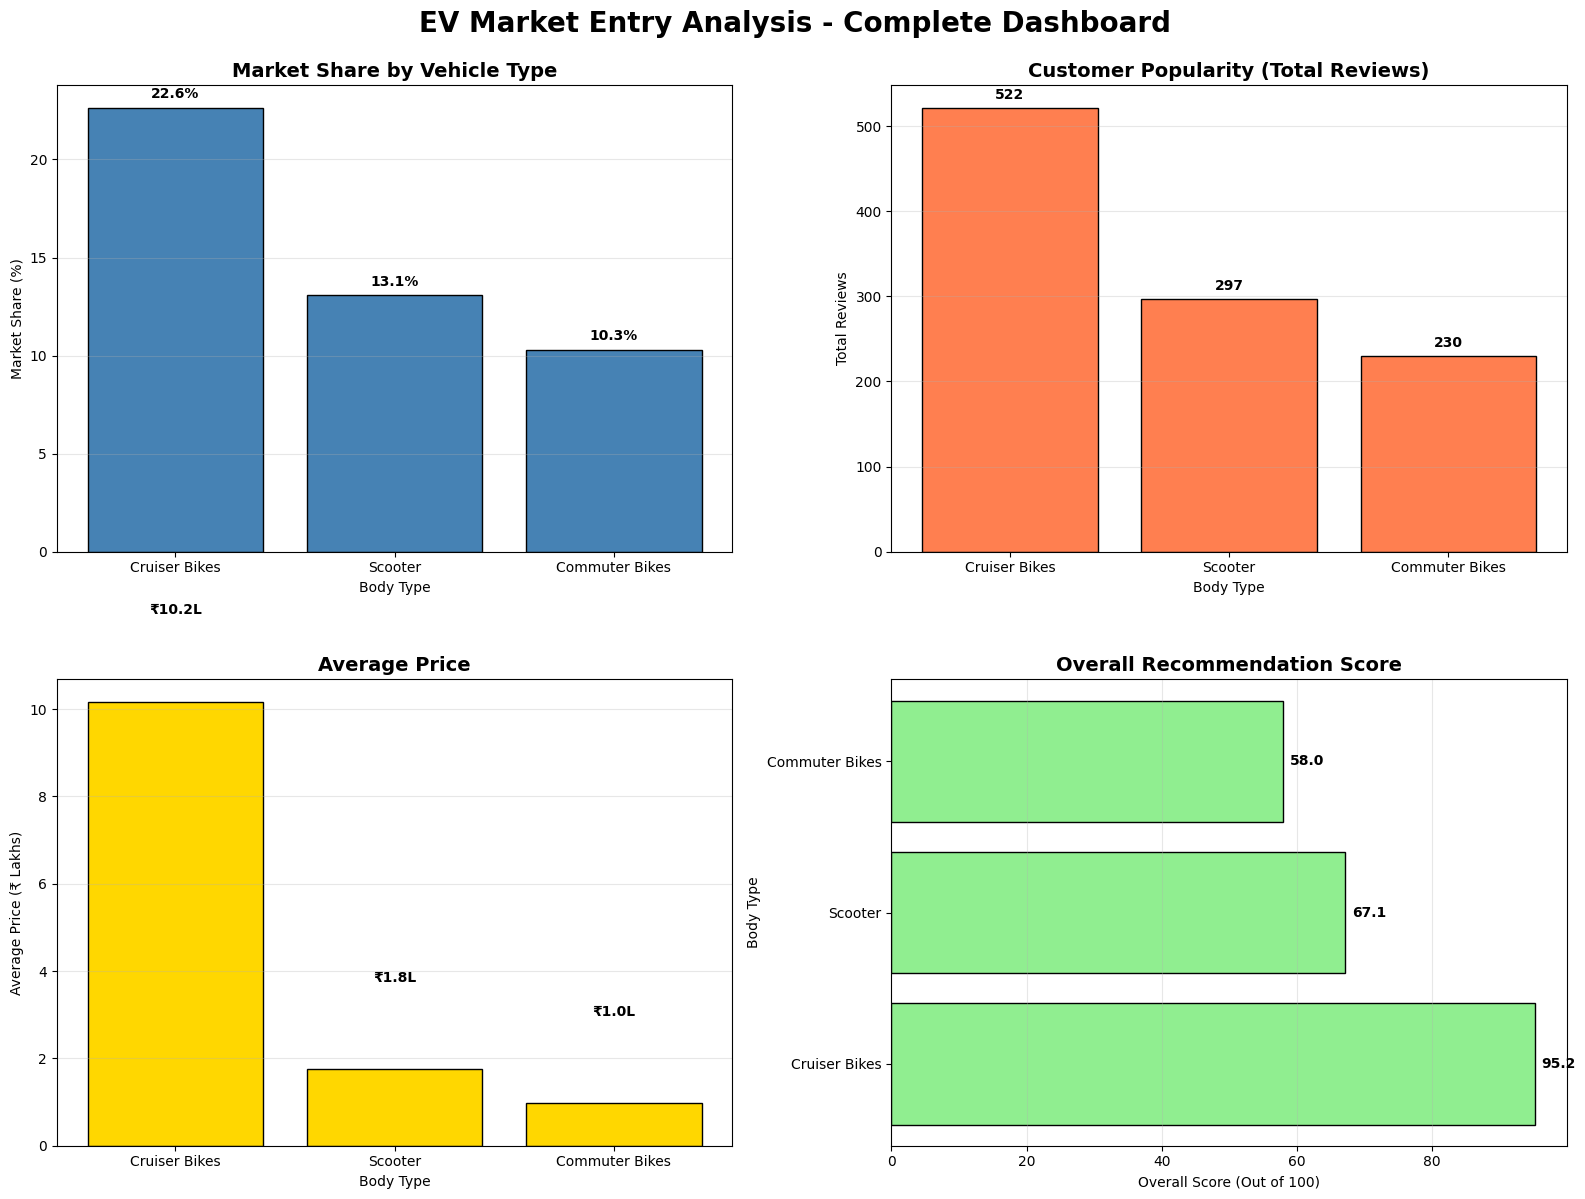

In [18]:
# Create a comparison dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('EV Market Entry Analysis - Complete Dashboard', fontsize=20, fontweight='bold', y=0.995)

# Create a DataFrame for plotting
summary_df = pd.DataFrame({
    'Body_Type': ['Cruiser Bikes', 'Scooter', 'Commuter Bikes'],
    'Market_Share_%': [22.65, 13.07, 10.28],
    'Total_Reviews': [522, 297, 230],
    'Avg_Price_INR': [1017163, 175708, 98072],
    'Overall_Score': [95.16, 67.14, 57.99]
})

# Plot 1: Market Share
top_5 = summary_df.head(5)
axes[0, 0].bar(top_5['Body_Type'], top_5['Market_Share_%'], color='steelblue', edgecolor='black')
axes[0, 0].set_title('Market Share by Vehicle Type', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Body Type')
axes[0, 0].set_ylabel('Market Share (%)')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(top_5['Market_Share_%']):
    axes[0, 0].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

# Plot 2: Customer Popularity
axes[0, 1].bar(top_5['Body_Type'], top_5['Total_Reviews'], color='coral', edgecolor='black')
axes[0, 1].set_title('Customer Popularity (Total Reviews)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Body Type')
axes[0, 1].set_ylabel('Total Reviews')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(top_5['Total_Reviews']):
    axes[0, 1].text(i, v + 10, f'{int(v)}', ha='center', fontweight='bold')

# Plot 3: Price Positioning
axes[1, 0].bar(top_5['Body_Type'], top_5['Avg_Price_INR']/100000, color='gold', edgecolor='black')
axes[1, 0].set_title('Average Price', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Body Type')
axes[1, 0].set_ylabel('Average Price (₹ Lakhs)')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(top_5['Avg_Price_INR']/100000):
    axes[1, 0].text(i, v + 2, f'₹{v:.1f}L', ha='center', fontweight='bold')

# Plot 4: Overall Ranking Score
axes[1, 1].barh(top_5['Body_Type'], top_5['Overall_Score'], color='lightgreen', edgecolor='black')
axes[1, 1].set_title('Overall Recommendation Score', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Overall Score (Out of 100)')
axes[1, 1].set_ylabel('Body Type')
axes[1, 1].grid(axis='x', alpha=0.3)
for i, v in enumerate(top_5['Overall_Score']):
    axes[1, 1].text(v + 1, i, f'{v:.1f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()
